In [ ]:
import pandas as pd

df=pd.read_csv(r"C:\Users\Atharva\Desktop\cicd git\env\Data\drug.csv")
df=df.sample(frac=1)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
142,60,M,HIGH,NORMAL,8.621,drugB
116,67,M,NORMAL,NORMAL,9.514,drugX
127,35,M,NORMAL,NORMAL,7.845,drugX
133,24,M,NORMAL,HIGH,25.786,DrugY
118,32,F,HIGH,NORMAL,10.292,drugA


In [7]:
from sklearn.model_selection import train_test_split

X=df[["Age","Sex","BP","Cholesterol","Na_to_K"]]
y=df["Drug"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X,y

(     Age Sex      BP Cholesterol  Na_to_K
 142   60   M    HIGH      NORMAL    8.621
 116   67   M  NORMAL      NORMAL    9.514
 127   35   M  NORMAL      NORMAL    7.845
 133   24   M  NORMAL        HIGH   25.786
 118   32   F    HIGH      NORMAL   10.292
 ..   ...  ..     ...         ...      ...
 121   15   M    HIGH      NORMAL   17.206
 102   28   F     LOW        HIGH   13.127
 56    65   M    HIGH      NORMAL   11.340
 104   22   M    HIGH      NORMAL   28.294
 83    38   F    HIGH      NORMAL   11.326
 
 [200 rows x 5 columns],
 142    drugB
 116    drugX
 127    drugX
 133    DrugY
 118    drugA
        ...  
 121    DrugY
 102    drugC
 56     drugB
 104    DrugY
 83     drugA
 Name: Drug, Length: 200, dtype: object)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

cat_col=[1,2,3]
num_col=[0,4]

transform =ColumnTransformer(
    [
        ("encoder",OrdinalEncoder(),cat_col),
        ("num_imputer",SimpleImputer(strategy="median"),num_col),
        ("num_scaler",StandardScaler(),num_col),
    ]
)

pipe=Pipeline(
    steps=[
        ("preprocessing",transform),
        ("model",RandomForestClassifier(n_estimators=100,random_state=42)),
    ]
)

pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=42))])

In [13]:
from sklearn.metrics import f1_score,accuracy_score

predictions=pipe.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
f1=f1_score(y_test,predictions,average="macro")

print(f"Accuracy {accuracy*100}% | F1 {f1}")

Accuracy 100.0% | F1 1.0


<Figure size 1200x800 with 0 Axes>

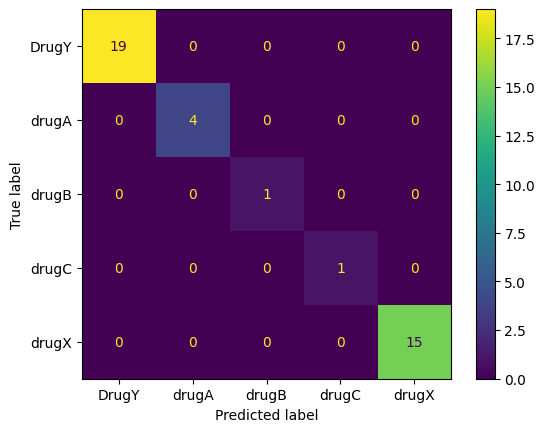

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm=confusion_matrix(y_test,predictions,labels=pipe.classes_)
plt.figure(figsize=(12,8))
Con=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=
                           pipe.classes_)
Con.plot()

plt.savefig(r"C:\Users\Atharva\Desktop\cicd git\env\Results\model_res.png",dpi=120)

In [ ]:
import skops.io as sio

sio.dump(pipe,r"C:\Users\Atharva\Desktop\cicd git\env\Model\drug_pipe.skops")